In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import scikit learn databases
from sklearn import datasets
# import california housing data from sklearn and store data into a variable
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [3]:
# define the columns names of the data then convert to dataframe
headers = calihouses.feature_names
df = pd.DataFrame(calidata, columns=headers)
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [4]:
target = calihouses.target
target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
calihouses.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [6]:
calihouses.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

# Data Exploration (exploratory data analysis or EDA)

In [7]:
df['target']=target

In [8]:
#Display The head ==> To Check if Data is Properly Imported
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [9]:
#To check the shape of the dataset
df.shape # (rows, columns)

(20640, 9)

In [10]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [66]:
# check for duplicates
print('sum of duplicated values{}\n'.format(df.duplicated().sum()))

sum of duplicated values0



In [11]:
# Are there any missing values?
df.isna().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

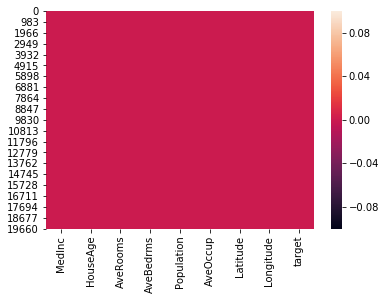

In [12]:
#summary statitics
sns.heatmap(df.isnull())

In [13]:
#Lets describe the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


According to Described Information:
All Features are not Normally Distributed( Theortically if feature is normally distributed, Mean = Median = Mode )
mean is higher than the median, which means  data is right skewed and ouliers are present

In [14]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of MedInc : 12928
number of unique valuse of HouseAge : 52
number of unique valuse of AveRooms : 19392
number of unique valuse of AveBedrms : 14233
number of unique valuse of Population : 3888
number of unique valuse of AveOccup : 18841
number of unique valuse of Latitude : 862
number of unique valuse of Longitude : 844
number of unique valuse of target : 3842


# Univariate  Analysis

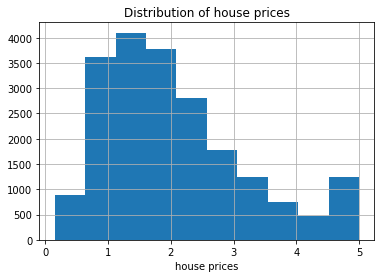

In [69]:
# matplotlib plots inline  
%matplotlib inline

# Plotting distribution of wins
df.target.hist()
plt.xlabel('house prices')
plt.title('Distribution of house prices')
plt.show()


 We can see that the  house prices is mostly falls between 0.8 to 2.5 with few exceptions.

MedInc           AxesSubplot(0.125,0.787927;0.227941x0.0920732)
HouseAge      AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
AveRooms      AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
AveBedrms        AxesSubplot(0.125,0.677439;0.227941x0.0920732)
Population    AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
AveOccup      AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
Latitude         AxesSubplot(0.125,0.566951;0.227941x0.0920732)
Longitude     AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
target        AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
dtype: object

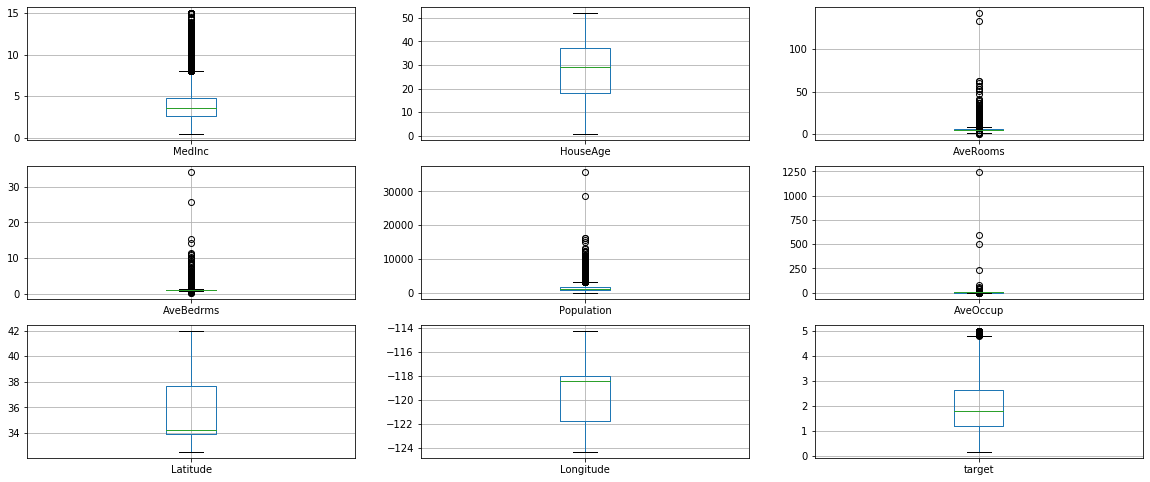

In [16]:
# Plotting the boxplot in order to check and visualize outliers
df.plot(kind='box', subplots=True, layout=(7,3),figsize=(20,20),grid=True,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B9EB85AC8>,
      dtype=object)

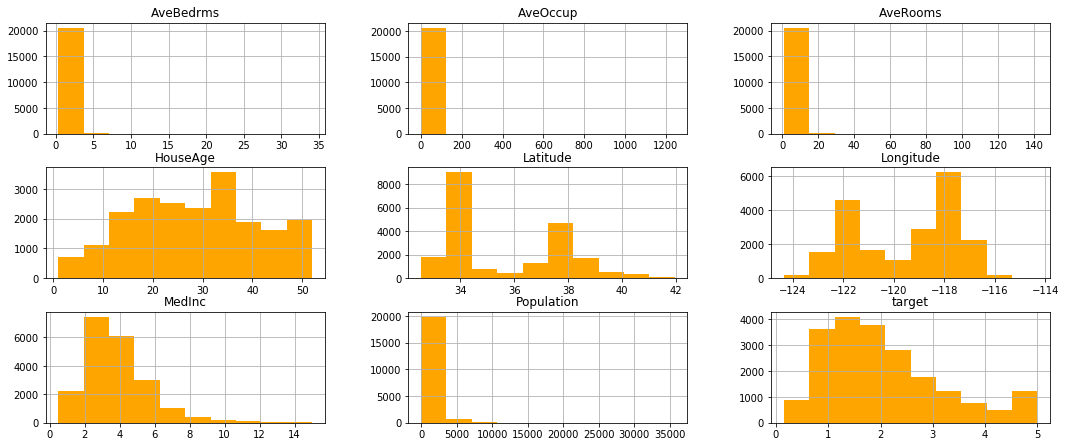

In [17]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(7,3),color='orange')

# Bivarient analysis

<Figure size 1440x360 with 0 Axes>

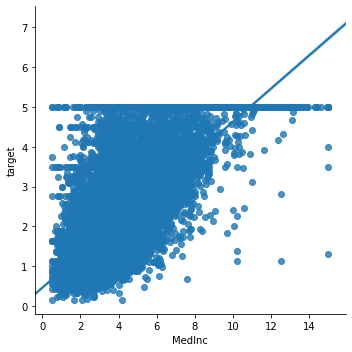

<Figure size 1440x360 with 0 Axes>

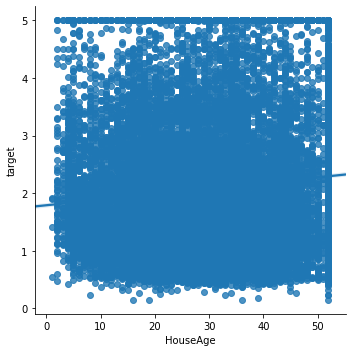

<Figure size 1440x360 with 0 Axes>

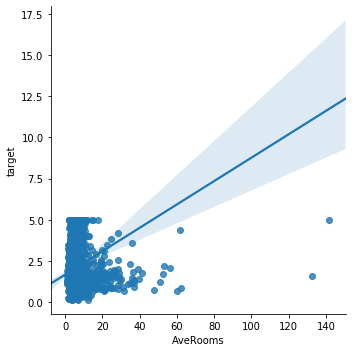

<Figure size 1440x360 with 0 Axes>

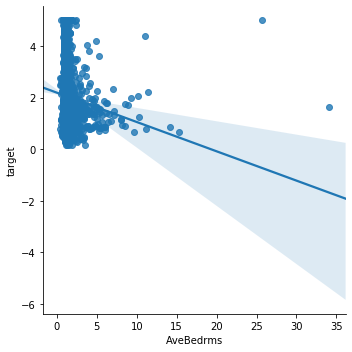

<Figure size 1440x360 with 0 Axes>

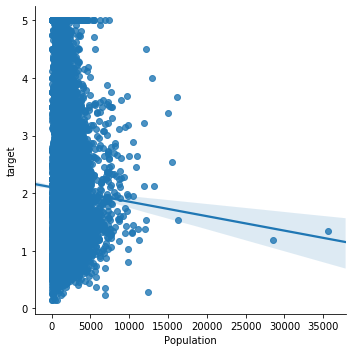

<Figure size 1440x360 with 0 Axes>

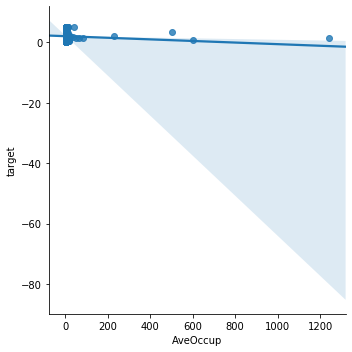

<Figure size 1440x360 with 0 Axes>

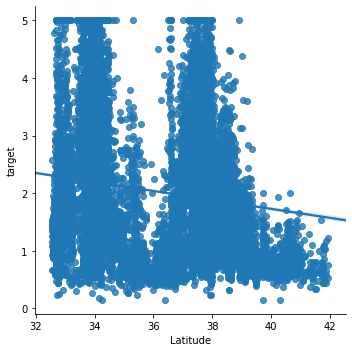

<Figure size 1440x360 with 0 Axes>

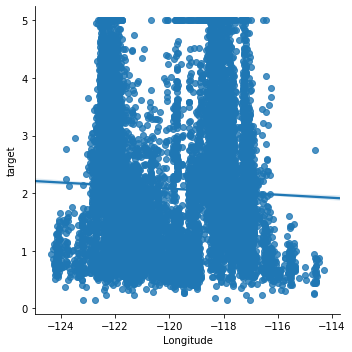

In [18]:
#lets visualize relationship of target with others fields

m=df.drop(['target'],axis=1).columns.values
for i in m:
    plt.figure(figsize=(20,5))
    sns.lmplot(x=i,y="target",data=df);
    plt.tight_layout()
    


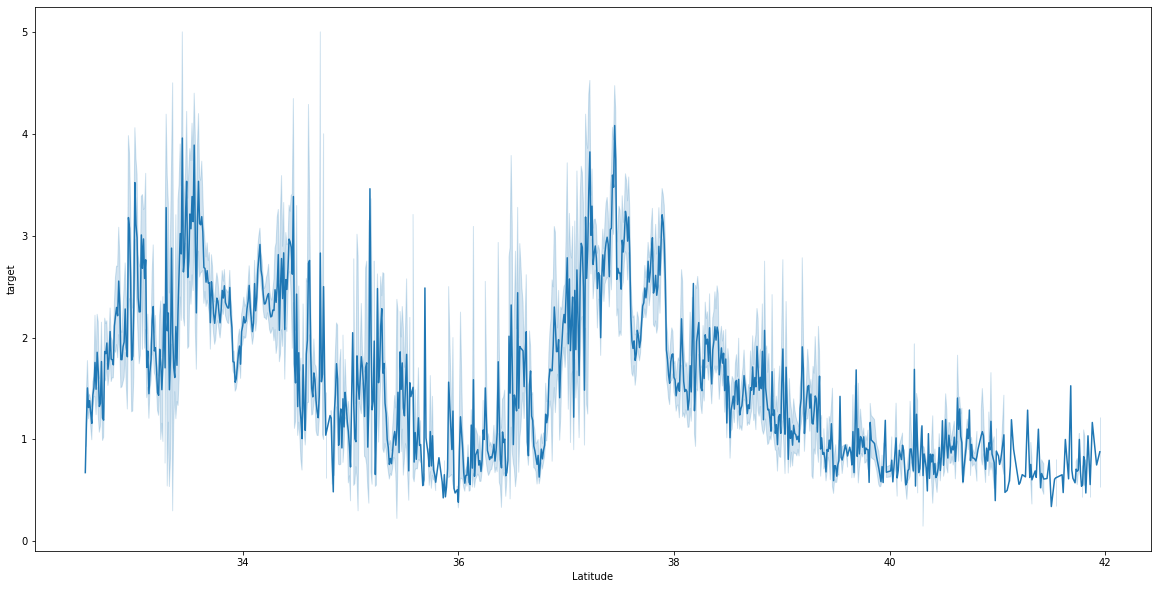

In [19]:
# Checking House Price with respect to the Latitude....
plt.figure(figsize=(20,10))
sns.lineplot(x='Latitude',y='target',data=df,palette='husl')

higher the latitude lesser the median_house_value

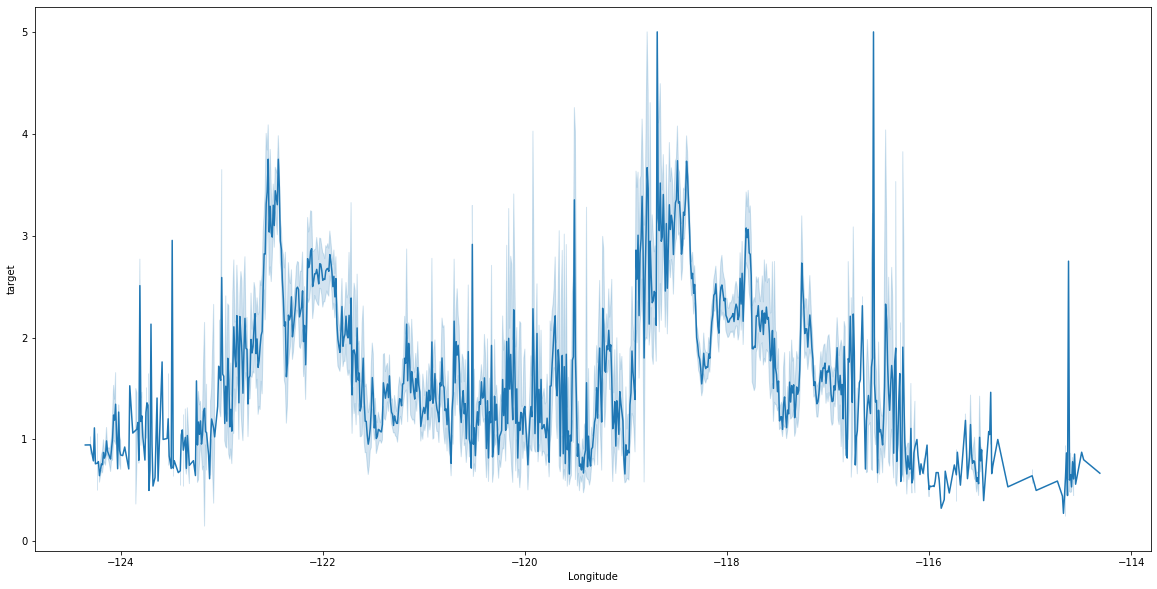

In [20]:
# Checking House Price with respect to the Longitude....
plt.figure(figsize=(20,10))
sns.lineplot(x='Longitude',y='target',data=df)

As we move from longitude (-116) to (-118), house prices increases

<Figure size 432x288 with 0 Axes>

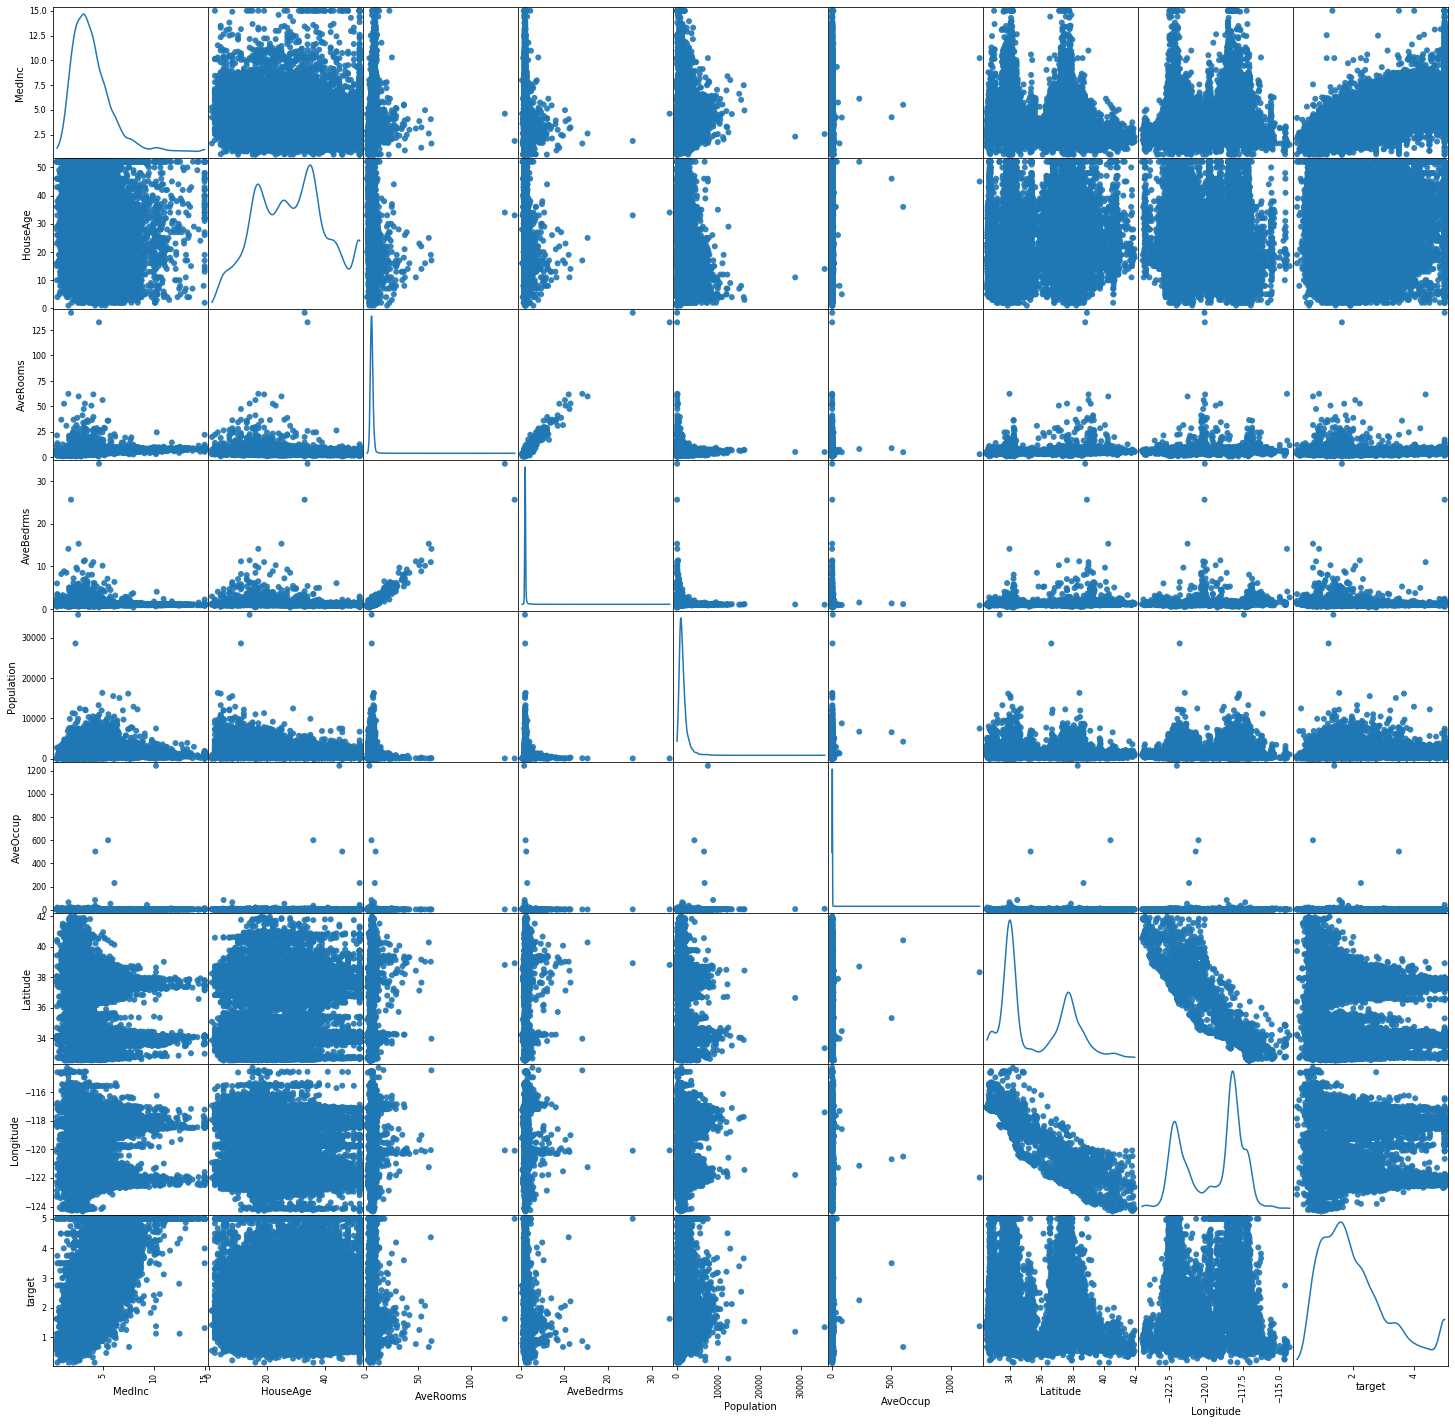

In [21]:
#plottig scatter matrix
from pandas.plotting import scatter_matrix
fig = plt.figure()
scatter_matrix(df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

Text(0, 0.5, 'Count')

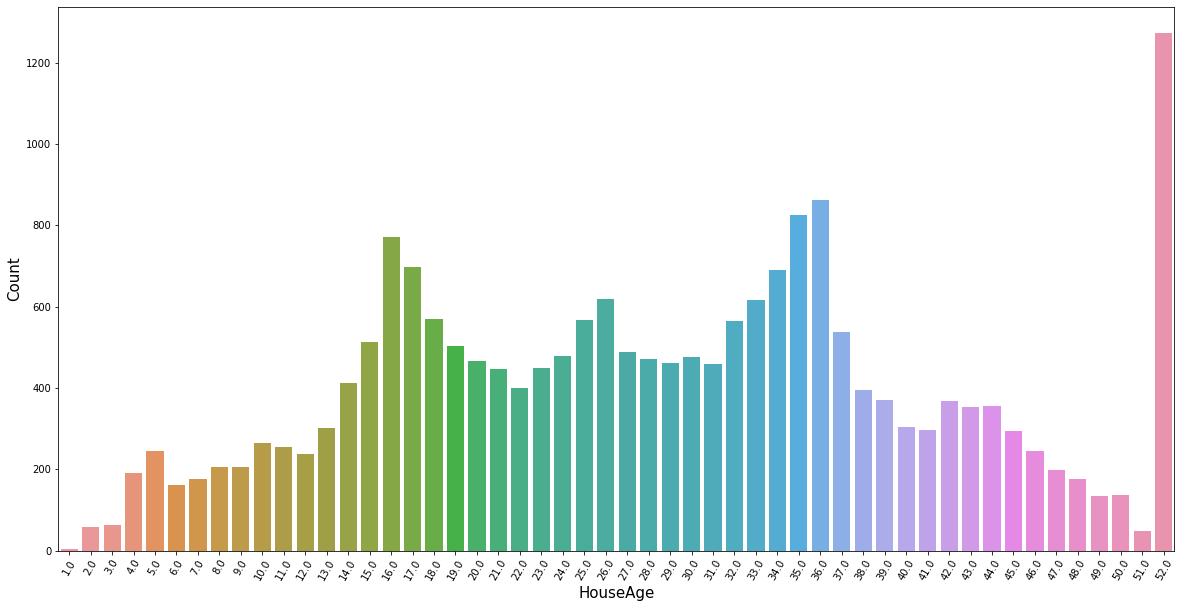

In [22]:
# Checking the number of houses of different ages... 
plt.figure(figsize=(20,10))
sns.countplot(x='HouseAge',data=df,)
plt.xticks(rotation=60,fontsize=10) 
plt.xlabel('HouseAge',fontsize=15)
plt.ylabel('Count',fontsize=15)

As the age of the house increses it's price also increases...

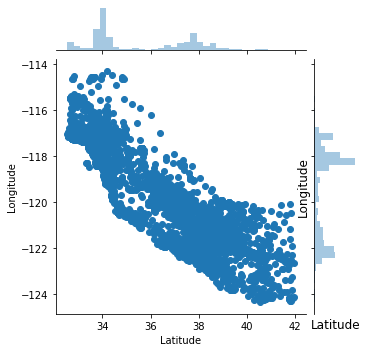

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [24]:
sns.jointplot(x='Latitude',y='Longitude',data=df,size=5)
plt.ylabel('Longitude',fontsize=12)
plt.xlabel('Latitude',fontsize=12)
plt.show()

sns.despine

For latitude between 32 and 40 there are many houses , which would mean that maybe it’s an ideal location . But when we talk about longitude we can see that concentration is high between -117 to -122.4. Which would mean that most of the buy’s has been for this particular location

In [25]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
target         0.977763
dtype: float64

In [26]:
#lets remove the skewness
for i in df.drop(['target'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])

In [27]:
#lets again check the skewness
df.skew()
#skewness still due to outliers

MedInc        0.226083
HouseAge      0.060331
AveRooms      1.390761
AveBedrms     8.988786
Population   -0.237002
AveOccup      3.879679
Latitude      0.465953
Longitude    -0.297801
target        0.977763
dtype: float64

In [28]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_california=df.loc[(z<3).all(axis=1)]
print(df_california.shape)

(20640, 9)
(19871, 9)


MedInc        0.130730
HouseAge      0.050746
AveRooms     -0.218163
AveBedrms     1.881339
Population    0.055707
AveOccup      0.214229
Latitude      0.467354
Longitude    -0.303905
target        0.970840
dtype: float64

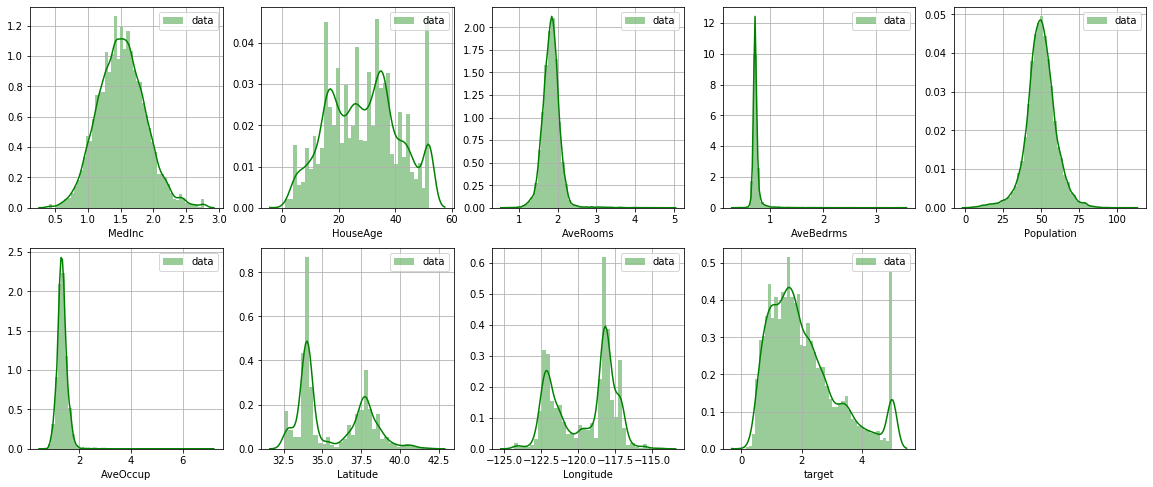

In [29]:
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,17))
for i,col in enumerate(list(df_california.columns.values)):
    plt.subplot(4,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

#lets again check the skewness after removing outliers
df_california.skew()

In [30]:
# Checking the correlation
df_california.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1,-0.15,0.67,-0.22,0.017,-0.071,-0.085,-0.016,0.67
HouseAge,-0.15,1,-0.21,-0.12,-0.3,-0.018,0.014,-0.1,0.1
AveRooms,0.67,-0.21,1,0.15,-0.08,0.0072,0.14,-0.094,0.3
AveBedrms,-0.22,-0.12,0.15,1,-0.034,-0.13,0.065,0.00025,-0.087
Population,0.017,-0.3,-0.08,-0.034,1,0.22,-0.13,0.12,-0.034
AveOccup,-0.071,-0.018,0.0072,-0.13,0.22,1,-0.16,0.18,-0.3
Latitude,-0.085,0.014,0.14,0.065,-0.13,-0.16,1,-0.93,-0.14
Longitude,-0.016,-0.1,-0.094,0.00025,0.12,0.18,-0.93,1,-0.045
target,0.67,0.1,0.3,-0.087,-0.034,-0.3,-0.14,-0.045,1


(9.0, 0.0)

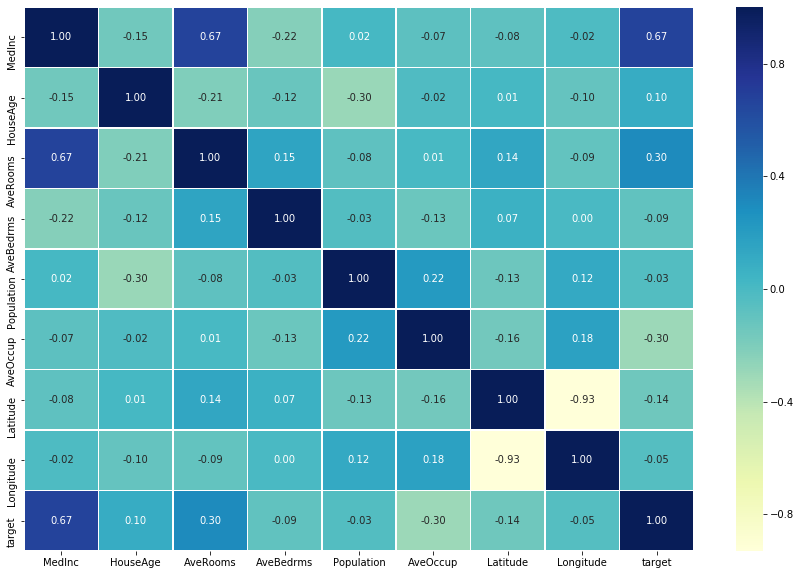

In [31]:
# Plotting Heatmap for Correlation
corr_matrix = df_california.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling

In [32]:
# Split data into X and y
X = df_california.drop("target", axis=1)

y = df_california["target"]

In [33]:
# Independent variables (no target column)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.232720,41.0,2.077455,0.704982,33.381266,1.268511,37.88,-122.23
1,2.230165,21.0,1.979364,0.678988,60.591543,1.134572,37.86,-122.22
2,2.111110,52.0,2.228738,0.729212,38.546590,1.335596,37.85,-122.24
3,1.893579,52.0,1.919471,0.729025,40.020167,1.266369,37.85,-122.25
4,1.578195,52.0,1.985385,0.732888,40.177775,1.157342,37.85,-122.25


In [34]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.074778,0.979315,1.363581,-0.372533,-1.915442,-0.443616,1.060013,-1.324453
1,2.067391,-0.624639,0.849872,-0.916841,1.169447,-1.192466,1.050625,-1.319453
2,1.723246,1.861490,2.155851,0.134847,-1.329838,-0.068551,1.045931,-1.329453
3,1.094443,1.861490,0.536212,0.130939,-1.162775,-0.455596,1.045931,-1.334452
4,0.182784,1.861490,0.881407,0.211809,-1.144907,-1.065156,1.045931,-1.334452
...,...,...,...,...,...,...,...,...
19866,-1.661645,-0.303848,-0.093092,0.731078,-0.548929,-0.435680,1.811040,-0.754467
19867,-0.711387,-0.865232,0.759302,2.449499,-1.783192,0.383974,1.815734,-0.814465
19868,-1.508073,-0.945430,0.043784,0.600706,-0.277671,-0.817375,1.787570,-0.819465
19869,-1.334392,-0.865232,0.147374,1.106439,-0.747455,-1.168485,1.787570,-0.869464


In [35]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_random_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [36]:
from xgboost import XGBRegressor

models = {"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=18),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "SVR":SVR(),
          "RandomForestRegressor":RandomForestRegressor(max_depth=2, random_state=0),
          "GradientBoostingClassifier":GradientBoostingRegressor(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "ElasticNet":ElasticNet(),
          "XGBRegressor":XGBRegressor()
         }
# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        r_state=max_random_score(model)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.22)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [37]:
model_scores = fit_and_score(models=models)

model_scores


max r2 score corresponding to 83 is: 0.7547094113301149
max r2 score corresponding to 83 is: 0.797766190345216
max r2 score corresponding to 76 is: 0.6682556573197247
max r2 score corresponding to 48 is: 0.6715013898573031
max r2 score corresponding to 73 is: 0.4895640053413419
max r2 score corresponding to 67 is: 0.8098597646314118
max r2 score corresponding to 0 is: 0
max r2 score corresponding to 76 is: 0.6682553690732805
max r2 score corresponding to 54 is: 0.18795254750683854
max r2 score corresponding to 65 is: 0.8551745691955511


{'KNeighborsRegressor': 0.7581795327076964,
 'SVR': 0.793499002489677,
 'LR': 0.6444113012560679,
 'DecisionTreeRegressor': 0.9999999999999567,
 'RandomForestRegressor': 0.45923093651206504,
 'GradientBoostingClassifier': 0.8060984929000747,
 'Lasso': 0.0,
 'Ridge': 0.6444112305685212,
 'ElasticNet': 0.17889750514629754,
 'XGBRegressor': 0.9451421833574121}

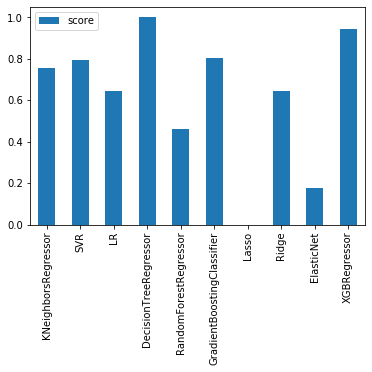

In [38]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [39]:
#Defining Instances For Differnt Models.
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
XGBRegressor=XGBRegressor()
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGBRegressor))

Model=[]
Score=[]
R2_score=[]
cvs=[]
mae=[]
mse=[]
Rmse=[]

# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
#   For Loop to Calculate R_2 Score, Cross Val Score and errors.
for name, model in models:
    Model.append(name)
    print(model)
    print('\n')
    r_state=max_random_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error=',Meanabsoluteerror)
    mae.append(Meanabsoluteerror*100)
    print('\n')
    Meansquarederror = mean_squared_error(y_test, y_pred)
    print('Mean squared error=',Meansquarederror)
    mse.append(Meansquarederror*100)
    print('\n')
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean squared error=',RootMeansquarederror)
    Rmse.append(RootMeansquarederror*100)
    print('\n')

        


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 76 is: 0.7417423594750364
R2 Score :  0.7417423594750364


Cross_val_score= 0.5850278289613197


Mean absolute error= 0.40914071591948764


Mean squared error= 0.3392974145803174


Root Mean squared error= 0.5824924158993982


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 83 is: 0.797766190345216
R2 Score :  0.797766190345216


Cross_val_score= 0.6984945314184641


Mean absolute error= 0.35175430143473657


Mean squared error= 0.263073874913024


Root Mean squared error= 0.5129072771106138


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


max r2 score corresponding to 76 is: 0.6682556573197247
R2 Score :  0.

In [40]:
result=pd.DataFrame({'Model':Model,'r2_score':R2_score,'Cross_val_score':cvs,'Mean absolute error':mae,'Mean squared error':mse,'Root Mean squared error':Rmse})
result

,Model,r2_score,Cross_val_score,Mean absolute error,Mean squared error,Root Mean squared error
0,KNeighborsRegressor,74.174236,58.502783,40.914072,33.929741,58.249242
1,SVR,79.776619,69.849453,35.175430,26.307387,51.290728
2,LinearRegression,66.825566,59.587808,50.733824,43.584382,66.018469
3,DecisionTreeRegressor,67.549327,32.936830,41.658231,42.497810,65.190344
4,RandomForestRegressor,83.067170,65.325460,31.311701,22.246255,47.165936
5,GradientBoostingRegressor,80.974851,67.443138,35.611370,25.602430,50.598844
6,AdaBoostRegressor,49.788150,40.995759,68.023742,66.159623,81.338566
7,Lasso,-0.015179,-9.070812,90.673377,129.763107,113.913611
8,Ridge,66.825537,59.587888,50.733104,43.584420,66.018498
9,ElasticNet,18.795255,10.396819,79.982898,104.495871,102.223222


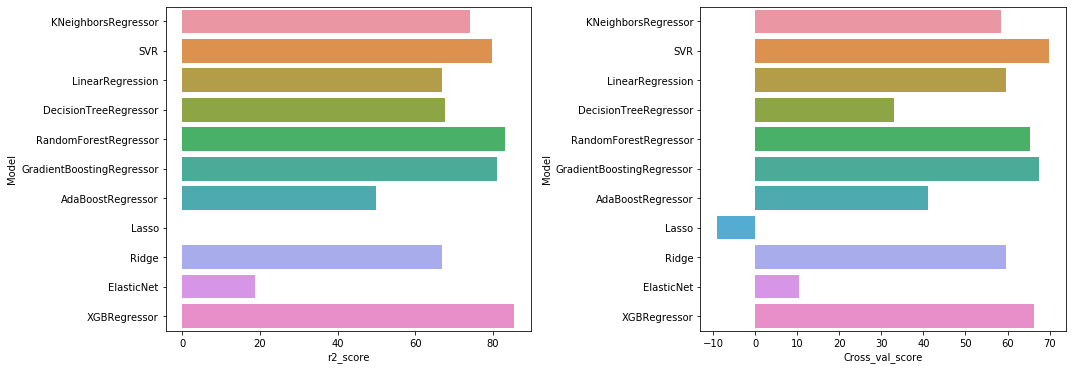

In [41]:
#Plotting bar plot of scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'r2_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [42]:
#function to evatulate errors
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    r2score = r2_score(y_test, y_preds)
    Meanabsoluteerror = mean_absolute_error(y_test, y_preds)
    Meansquarederror = mean_squared_error(y_test, y_preds)
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_preds))
    metric_dict = {"r2score": round(r2score, 2),
                   "Mean absolute error": round(Meanabsoluteerror, 2),
                   "Mean squared error": round(Meansquarederror, 2), 
                   "Root Mean squared error": round(RootMeansquarederror, 2),
                   }
    print(f"r2score: {r2score * 100:.2f}%")
    print(f"Mean absolute error: {Meanabsoluteerror:.2f}")
    print(f"Mean squared error: {Meansquarederror:.2f}")
    print(f"Root Mean squared error: {RootMeansquarederror:.2f}")

    return metric_dict

# Tuning a model with GridSearchCV


In [43]:
#lets use gridsearchcv to find out best parameters for RandomForestRegressor
grid5 = {'n_estimators': [100, 500, 1000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestRegressor(n_jobs=1)

# Setup GridSearchCV
gs_clf5 = GridSearchCV(estimator=clf,
                      param_grid=grid5,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf5.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 18.0min finished


In [44]:
# best parameters for RandomForestRegressor
print("Best parameter:",gs_clf5.best_params_)
print("score:",gs_clf5.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
score: 0.6598497034083457


In [45]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestRegressor(n_estimators=100,max_depth=None, min_samples_leaf= 1, max_features= 'auto',min_samples_split=6)
max_random_score(rf)

max r2 score corresponding to 95 is: 0.8303334720256655


95

In [47]:
#for getting best set of parameters for GradientBoostingRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid1 = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}

clfD = GradientBoostingRegressor()

# Setup GridSearchCV
gs_clf1 = GridSearchCV(estimator=clfD,
                      param_grid=grid1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clf1.fit(x, y);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   56.2s finished


In [48]:
# best parameters for GradientBoostingRegressor
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'learning_rate': 0.1, 'n_estimators': 500}
score: 0.6911427621418283


In [49]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators= 500)
max_random_score(gbr)

max r2 score corresponding to 67 is: 0.8489969021043318


67

In [51]:
from xgboost import XGBRegressor
#lets use gridsearchcv to find out best parameters for XGBRegressor
grid_6 = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
        "min_child_weight" : [ 1, 3, 5, 7 ],
        "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
         }
clf6 = XGBRegressor()

# Setup GridSearchCV
gs_clf6 = GridSearchCV(estimator=clf6,
                      param_grid=grid_6,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf6.fit(x_train, y_train);

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [52]:
# best parameters for XGBRegressor
print("Best parameter:",gs_clf6.best_params_)
print("score:",gs_clf6.best_score_)

Best parameter: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 7}
score: 0.8468433338653018


In [56]:
#checking r2 score using best parameters which calculated from gridsearchCV
xgb=XGBRegressor(colsample_bytree= 0.7, gamma= 0.3, learning_rate= 0.1, max_depth= 10, min_child_weight= 7)
max_random_score(xgb)

max r2 score corresponding to 95 is: 0.8665879749092362


95

In [73]:
#using AdaBoostRegressor base_estimator as RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=None, min_samples_leaf= 1, max_features= 'auto',min_samples_split=6,random_state=95)
ad=AdaBoostRegressor(base_estimator=rf)
ad.fit(x_train, y_train)
y_predrad = ad.predict(x_test)
evaluate_preds(y_test,y_predrad)


r2score: 84.59%
Mean absolute error: 0.31
Mean squared error: 0.20
Root Mean squared error: 0.45


{'r2score': 0.85,
 'Mean absolute error': 0.31,
 'Mean squared error': 0.2,
 'Root Mean squared error': 0.45}

# After all this process conclusion is that XGBRegressor is performing well.


In [57]:
#lets make our final model
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.22,random_state=95)
xgb=XGBRegressor(colsample_bytree= 0.7, gamma= 0.3, learning_rate= 0.1, max_depth= 10, min_child_weight= 7)
xgb.fit(x_train, y_train)
y_predxg = xgb.predict(x_test)
evaluate_preds(y_test,y_predxg)


r2score: 86.66%
Mean absolute error: 0.28
Mean squared error: 0.17
Root Mean squared error: 0.42


{'r2score': 0.87,
 'Mean absolute error': 0.28,
 'Mean squared error': 0.17,
 'Root Mean squared error': 0.42}

Text(0, 0.5, 'Predicted Y')

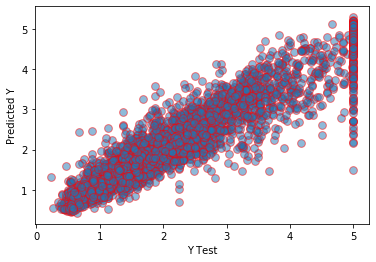

In [68]:
#plot of Y Test and Predicted Y
plt.scatter(x=y_test,y=y_predxg,marker="o",edgecolors ="r",s=60,alpha=0.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


Getting linear relatipnship means that our model performes well.

In [59]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predxg})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
2194,0.553,0.524448
18597,2.048,2.509185
7296,1.690,1.459660
19808,0.852,0.913534
3468,1.724,1.761377
...,...,...
12078,1.110,1.359373
537,2.000,1.780535
13194,1.282,1.529801
16407,1.304,1.493606


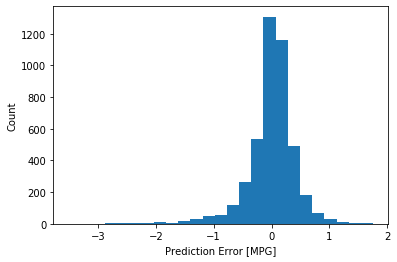

In [72]:
#lets visualize the error
error = y_predxg - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

getting almost negligible error means our model performe well

In [60]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(y_predxg)
df1.to_csv('Project13_California_housing_submission.csv',index=False)

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (target) 

In [61]:
# Find feature importance of our best model
xgb.feature_importances_

array([0.39674532, 0.06485819, 0.11609694, 0.03383575, 0.02393573,
       0.13109823, 0.13151328, 0.10191657], dtype=float32)

In [62]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

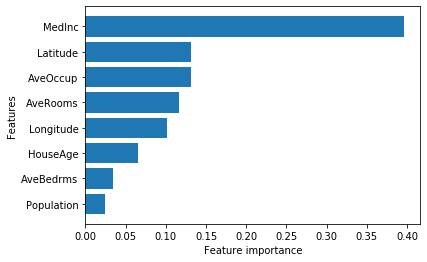

In [63]:
#bar plot of important features 
plot_features(x_train.columns, xgb.feature_importances_)

Looks like MedInc contribute the most in California_housing dataset.

In [64]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(xgb,'Project13_California_housing_submission.pkl')

['Project13_California_housing_submission.pkl']

In [65]:
#read the file using joblib
xg_from_joblib=joblib.load('Project13_California_housing_submission.pkl')
joblib_y_preds = xg_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

r2score: 86.66%
Mean absolute error: 0.28
Mean squared error: 0.17
Root Mean squared error: 0.42


{'r2score': 0.87,
 'Mean absolute error': 0.28,
 'Mean squared error': 0.17,
 'Root Mean squared error': 0.42}

# Conclusion

1) MedInc and target have a linear and strong positive relationship means that high median income increases house prices also increases.
2) House Age and target have a linear and weak positive relationship means older the houses their price could be little expensive.
3) AveRooms and target have a  high positive  relationship means tha large no of rooms in the house lead to increase in price of house.
4) Population and target have a weak negative  relationship high population in a block lead to small decrease in prices.
5) AveOcuup and target have a  low weak negative relationship or almost no relation means that it doesnt put impact on house prices.
6) latitude and longitude both  have a weak negative relationship with target variable means higher the value of longitude and latitude fall down the house prices value.
7)higher the latitude lesser the median_house_value
9)As we move from longitude (-116) to (-118), house prices increases
10)As the age of the house increses it's price also increases...
11)For latitude between 32 and 40 there are many houses , which would mean that maybe it’s an ideal location . But when we talk about longitude we can see that concentration is high between -117 to -122.4. Which would mean that most of the buy’s has been for this particular location
12) We can see that more number of houses are those who have age =52.

## Steps Followed:

1) Data Analysis.
2) EDA Analysis.
3) Best parameters are found using Gridsearch cv and applied to models.
4) Best parameters are applied to each models and machine is trained for each models to find Best r2 Score and rmse.
5) A Result table is made comprises of r2_score	Cross_val_score	Mean absolute error	Mean squared error	Root Mean squared error of each model.
6) XGBRegressor is used to train the model finally as it's r2 score and rmse is best among the rest of the models.
7) Predicted values are saved in Project13_California_housing_submission.csv file.
8) Pickle file is named with Project13_California_housing_submission.pkl 